<a href="https://colab.research.google.com/github/rosariorogel/DataSciencieRRS/blob/main/RRS_IntroPython_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pronósticos a escala

En esta cuarta sesión analizaremos la biblioteca **Prophet**.

`Prophet` es un procedimiento de pronóstico de datos de series temporales basado en un modelo aditivo en el que las tendencias no lineales se ajustan con estacionalidad anual, semanal y diaria, además de efectos de vacaciones. Funciona mejor con series temporales que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto a los datos que faltan y a los cambios en la tendencia, y normalmente maneja bien los valores atípicos.

La documentación de la biblioteca puede consultarse [aquí](https://facebook.github.io/prophet/).

### Instalación

Prophet está en PyPI, por lo que podemos usar pip para instalarlo.

In [ ]:
!pip install prophet

1. A partir de la v0.6, Python 2 ya no está soportado.
2. A partir de la v1.0, el nombre del paquete en PyPI es "prophet"; antes de la v1.0 era "fbprophet".
3. A partir de la v1.1, la versión mínima de Python soportada es 3.7.

La entrada a Prophet es siempre un marco de datos con dos columnas: ds e y. La columna ds (datestamp) debe tener el formato esperado por Pandas, idealmente YYYY-MM-DD para una fecha o YYYY-MM-DD HH:MM:SS para una marca de tiempo. La columna y debe ser numérica, y representa la medida que deseamos pronosticar.

Como ejemplo, veamos una serie temporal del registro diario de páginas vistas de la página de Peyton Manning en Wikipedia. Peyton Manning es un buen ejemplo porque ilustra algunas de las características de Prophet, como la estacionalidad múltiple, las tasas de crecimiento cambiantes y la capacidad de modelar días especiales (como las apariciones de Manning en los playoffs y en la Superbowl). El CSV está disponible [aquí](https://github.com/facebook/prophet/blob/main/examples/example_wp_log_peyton_manning.csv).

Importamos los datos:

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

In [ ]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Para ajustar el modelo, instanciamos un nuevo objeto `Prophet`. Cualquier configuración del procedimiento de pronóstico se pasa al constructor. A continuación, se llama al método de ajuste (`fit`) y se le pasa el conjunto de datos histórico. El ajuste debería tardar entre 1 y 5 segundos.

In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcsq7w30r/4uz64bhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcsq7w30r/7m7tiuya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21498', 'data', 'file=/tmp/tmpcsq7w30r/4uz64bhj.json', 'init=/tmp/tmpcsq7w30r/7m7tiuya.json', 'output', 'file=/tmp/tmpcsq7w30r/prophet_modelfv0ovuiz/prophet_model-20240113174114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Las predicciones se realizan en un marco de datos con una columna ds que contiene las fechas para las que se va a realizar una predicción. Puede obtener un marco de datos adecuado que se extienda hacia el futuro un número especificado de días utilizando el método de ayuda Prophet.make_future_dataframe. Por defecto también incluirá las fechas del histórico, por lo que también veremos el ajuste del modelo.

In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


El método predecir asignará a cada fila en el futuro un valor predicho que denomina yhat. Si se le pasan fechas históricas, proporcionará un ajuste dentro de la muestra. El objeto de predicción aquí es un nuevo marco de datos que incluye una columna yhat con la predicción, así como columnas para componentes e intervalos de incertidumbre.

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.478337,8.913356
3266,2017-01-16,8.535122,7.791962,9.240656
3267,2017-01-17,8.322549,7.604596,9.028648
3268,2017-01-18,8.155179,7.371936,8.868710
3269,2017-01-19,8.167136,7.400659,8.852181


Puede trazar la previsión llamando al método Prophet.plot e introduciendo el marco de datos de la previsión.

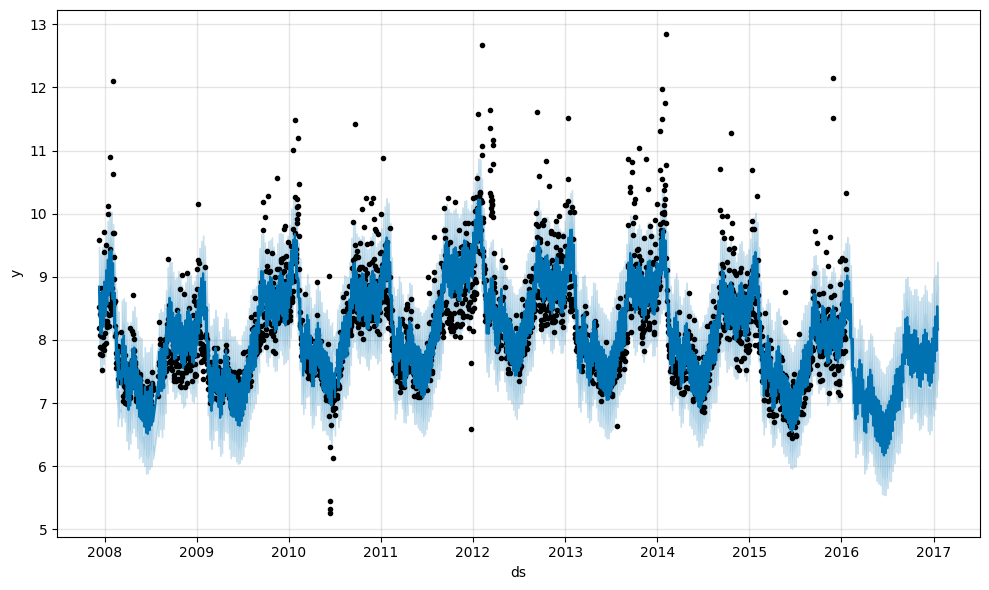

In [ ]:
# Python
fig1 = m.plot(forecast)

Si desea ver los componentes del pronóstico, puede utilizar el método Prophet.plot_components. Por defecto, verá la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie temporal. Si incluye días festivos, también los verá aquí.

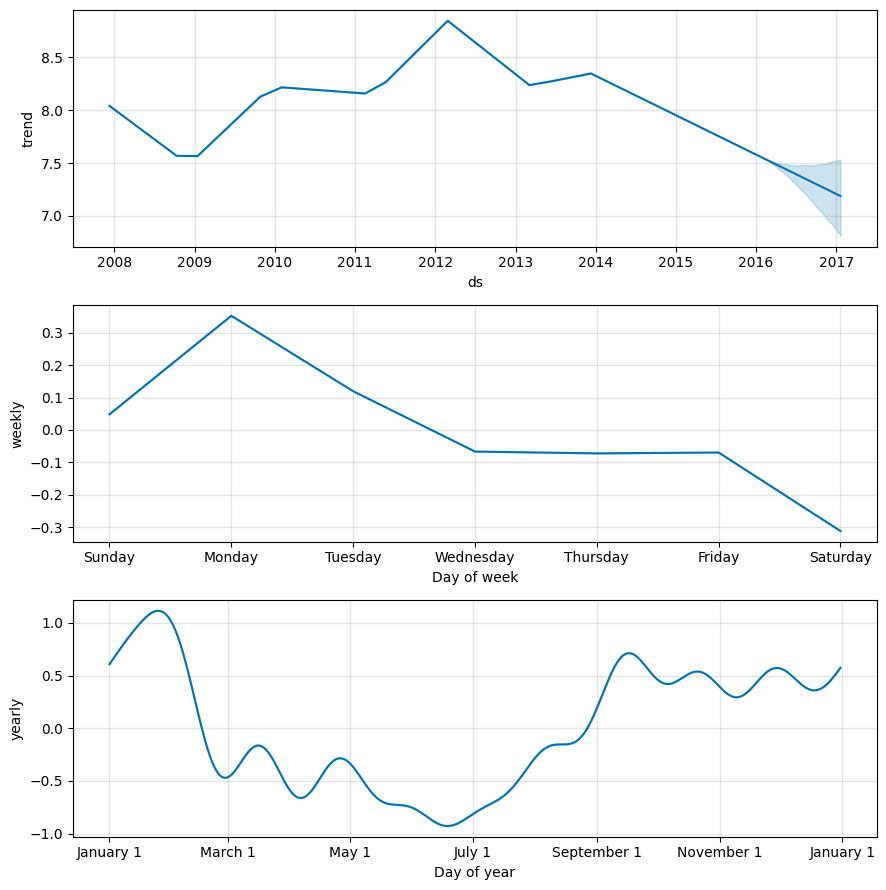

In [ ]:
# Python
fig2 = m.plot_components(forecast)

Se puede crear una figura interactiva del pronóstico y los componentes con plotly. Tendrá que instalar plotly 4.0 o superior por separado, ya que no se instalará por defecto con prophet. También tendrá que instalar los paquetes notebook e ipywidgets. Colab ya lo incluye por defecto.

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)